In [1]:
### import dependencies 
from cltk.corpus.readers import get_corpus_reader
latin_corpus = get_corpus_reader(corpus_name = 'latin_text_latin_library', language = 'latin')

In [2]:
### check file path
print(latin_corpus)

<FilteredPlaintextCorpusReader in '/Users/jameswinestock 1/cltk_data/latin/text/latin_text_latin_library'>


In [3]:
### check how many items in corpus
len(list(latin_corpus.docs()))

2141

In [4]:
### show all available file ids that you can use in the text reader
#print(latin_corpus.fileids())


In [5]:
### set a variable that is the list of all file names so we can iterate over it
files = latin_corpus.fileids()

In [6]:
### iterate over the files list and return only files which contain Livy and don't contain per
livy_path = [file for file in files if 'livy' in file and 'per' not in file]

In [7]:
livy_path_sorted = sorted(livy_path)

In [8]:
### check that we're getting what we want; yep Livy books 1-45 n.b 11-20 don't exist so won't show up plus 1 is .
#print(livy_path_sorted)

In [9]:
# check that 36 texts show up i.e. books 1-10;21-45 and the preface
len(livy_path)

36

In [10]:
#use the .words method from the cltk corpus reader function to read the texts in Livy
#and return each word in each text
livy_words = latin_corpus.words(livy_path)
livy_words

<generator object FilteredPlaintextCorpusReader.words at 0x110c0adb0>

In [11]:
### convert the generator object into a list of words
livy_words_list = list(livy_words)

In [12]:
#show the first 100 words so we can get an idea for the data we have
#print(livy_words_list[:100])

In [13]:
# convert the words into lower case
low_livy_list = [word.lower() for word in livy_words_list]

In [14]:
#check the result
#print(low_livy_list[:100])

In [15]:
#import lematizer
from cltk.stem.lemma import LemmaReplacer

In [16]:
# tell the lematizer it will be the latin version as opposed to e.g. Ancient Greek
lemmatizer = LemmaReplacer('latin')


In [17]:
#iterate over list of words and lemamatize each
lematize_livy = [lemmatizer.lemmatize(word) for word in low_livy_list]

In [18]:
#print(lematize_livy[:100])

still working, checkpoint

In [19]:
# import cltk's pre-made stopword list
from cltk.stop.latin import STOPS_LIST

In [20]:
S = STOPS_LIST

In [21]:
# check what they have in their list
#print(S)

In [22]:
# when we lematized the list it wrapped it in a second list so we have to get back to just one list
flat_list = [item for sublist in lematize_livy for item in sublist]

In [23]:
# check that flat list
#print(flat_list[:100])

In [24]:
livy_stops_removed = [w for w in flat_list if w not in STOPS_LIST]

In [25]:
# declare my own list of junk words or symbols not caught by cltk
junk = ['cn.', 't.', 'q.', "'", 'm.', 'p.', '[', ']', '.', ',', ' ', ':', ';', 'qui1', '-', 'que', '$', '%', '&','*','+', '-', '/', '<', '=', '>', '@', '^', '_',  '`', '{', '|', '}', '~', '?', '!', '«', '»']
livy_junk_removed = [w for w in livy_stops_removed if w not in junk]

In [26]:
#compare the number of words before and after the junk is removed
len(livy_stops_removed)

499381

In [27]:
len(livy_junk_removed)

385578

In [28]:
# re-declare the variable so it makes more sense
clean_livy = livy_junk_removed

In [29]:
# this base python method will help us create a dictionary of word frequencies
from collections import Counter

In [30]:
# apply the counter to our cleaned text
livy_word_counts_counter = Counter(clean_livy)

In [31]:
# it works, just put whatever word you want in and it will return its word count
print(livy_word_counts_counter['populo'])

440


^^^ checkpoint: lematized, cleaned, counter working. ^^^

In [32]:
import nltk
import numpy
import matplotlib
from nltk.probability import FreqDist

In [33]:
# now to interact with the more interesting natural language processing libraries we need to convert our processed text
# into nltk tokens.
mytext = nltk.Text(clean_livy)

In [34]:
print(mytext[:10])

['livy', 'book', 'eo1', 'titi', 'livi', 'vrbe', 'condio', 'libo1', 'eo1', '1']


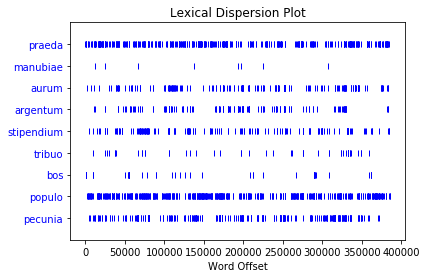

In [54]:
# use the nltk dispersion plot function to show how words we are interested in are spread across a text
# n.b must run TWICE before it works
mytext.dispersion_plot(["praeda", "manubiae", "aurum", "argentum","stipendium", "tribuo", "bos", "populo", "pecunia"])

In [55]:
fdist1 = FreqDist(mytext)

In [56]:
print(fdist1)

<FreqDist with 16090 samples and 385578 outcomes>


In [38]:
# let's get a list of word counts throughout Livy
# praeda is in the top 250 nouns or verbs list
# we could further refine this to work with only nouns
fdist1.most_common(250)

[('sum1', 8607),
 ('edo1', 8234),
 ('eo1', 3106),
 ('hostis', 2628),
 ('facio', 2461),
 ('bellus', 2442),
 ('omne', 2437),
 ('magnus', 2166),
 ('urbs', 2093),
 ('neo1', 1989),
 ('ito', 1941),
 ('habeo', 1935),
 ('alius2', 1873),
 ('quis1', 1772),
 ('consulo', 1759),
 ('reor', 1712),
 ('primus', 1642),
 ('consul', 1629),
 ('exerceo', 1627),
 ('do', 1549),
 ('senatus', 1498),
 ('jam', 1468),
 ('mitto', 1430),
 ('indo', 1390),
 ('venio', 1350),
 ('capio', 1339),
 ('video', 1320),
 ('mille', 1320),
 ('jubeo', 1291),
 ('res', 1234),
 ('dico2', 1214),
 ('populus1', 1169),
 ('castro', 1116),
 ('duo', 1099),
 ('ager', 1093),
 ('lego1', 1092),
 ('suo', 1080),
 ('animus', 1066),
 ('quoque', 1046),
 ('duco', 1039),
 ('armo', 1033),
 ('dies', 1033),
 ('miles', 1029),
 ('ago', 1018),
 ('tribunus', 985),
 ('tantus', 966),
 ('fero', 964),
 ('multus', 956),
 ('redeo', 940),
 ('l.', 910),
 ('gero1', 903),
 ('"', 882),
 ('pro1', 853),
 ('causa', 837),
 ('ceter', 834),
 ('pars', 828),
 ('romani', 822),
 

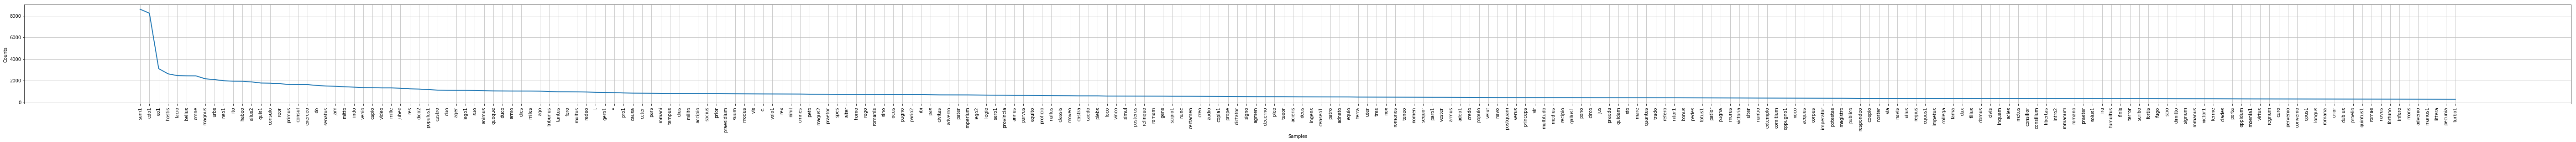

In [59]:
# let's look at a graph of word occurences
import matplotlib.pyplot as plt
plt.figure(figsize=(100, 4))
fdist1.plot(250, cumulative=False)

In [40]:
my_bigrams = list(nltk.bigrams(mytext))

In [41]:
print(my_bigrams[100:110])

[('antenorem', 'multitudo'), ('multitudo', 'ex-neo1'), ('ex-neo1', 'seditio'), ('seditio', 'paphlagonia'), ('paphlagonia', 'pello'), ('pello', 'sedeo'), ('sedeo', 'dux'), ('dux', 'rego'), ('rego', 'pylaemene'), ('pylaemene', 'troiam')]


In [42]:
def find_bigrams(keyword):
    for tuple in my_bigrams:
        if keyword in tuple:
            print(tuple)

In [43]:
find_bigrams("praeda")

('supersum', 'praeda')
('praeda', 'ager')
('latro2', 'praeda')
('praeda', 'onustus')
('ira', 'praeda')
('praeda', 'amitto')
('modus', 'praeda')
('praeda', 'ago')
('eo1', 'praeda')
('praeda', 'volo1')
('ager', 'praeda')
('praeda', 'porto')
('magus2', 'praeda')
('praeda', 'studium')
('romano', 'praeda')
('praeda', 'vicis')
('ingens', 'praeda')
('praeda', 'romam')
('capio', 'praeda')
('praeda', 'indo')
('reor', 'praeda')
('praeda', 'captivus')
('alius2', 'praeda')
('praeda', 'spero')
('divendo', 'praeda')
('praeda', 'quadraginta')
('parito', 'praeda')
('praeda', 'munificus1')
('indo', 'praeda')
('praeda', 'dulcedo')
('urbs', 'praeda')
('praeda', 'spero')
('suum', 'praeda')
('praeda', 'edo1')
('opus1', 'praeda')
('praeda', 'delenio')
('pecus2', 'praeda')
('praeda', 'ago')
('magnus', 'praeda')
('praeda', 'romam')
('vasto', 'praeda')
('praeda', 'undique')
('populatio1', 'praeda')
('praeda', 'dius')
('alius2', 'praeda')
('praeda', 'ingens')
('solo1', 'praeda')
('praeda', 'contendo')
('magnus'

In [44]:
# we are now going to build a netword of words in Livy using the co-occurence method
import networkx as nx

In [45]:
# generate a network whereby each word is connected by an edge to the words either side of it
G=nx.Graph()
for i in range(1, len(mytext)):
    G.add_edge(mytext[i-1],mytext[i])
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 16090
Number of edges: 228044
Average degree:  28.3461


In [46]:
# how many connections does each word have?
degree = nx.degree(G)

In [47]:
#degree

In [48]:
sorted_degree = sorted(dict(nx.degree(G)).items(),key=lambda x:x[1], reverse=True)

In [49]:
#show the 250 words with most connections
#these ranks will be similar to our word frequency score
for word, degree in sorted_degree[:250]:
        print(word, degree)

sum1 3760
edo1 3410
eo1 1911
omne 1689
facio 1680
neo1 1570
ito 1514
hostis 1475
alius2 1456
magnus 1455
habeo 1450
bellus 1447
urbs 1363
primus 1317
quis1 1298
jam 1257
indo 1250
reor 1202
consul 1198
do 1188
video 1161
consulo 1145
exerceo 1137
venio 1134
mitto 1100
jubeo 1084
capio 1071
quoque 1046
suo 1001
dico2 986
ager 949
tantus 948
duco 946
lego1 938
res 928
fero 890
senatus 888
animus 885
modus 872
ceter 870
duo 861
multus 860
ago 843
armo 833
redeo 824
magus2 804
dies 798
miles 797
omnes 793
pro1 779
castro 771
peto 767
rex 764
prior 758
volo1 758
pars 757
milito 756
alter 753
accipio 749
suum 743
causa 735
populus1 734
" 730
romanis 728
rego 723
tribunus 717
tempus 709
ibi 704
locus 694
adverro 694
gero1 694
sino 686
praetor 682
nihil 680
pugno 680
l. 679
romani 678
pater 677
nunc 668
lego2 664
civitas 661
homo 659
vis 656
socius 656
praesidium 644
spes 635
pario2 634
parvus 632
dius 631
prope 628
simul 627
moveo 615
c. 613
relinquo 609
nullus 604
proficio 602
pax 601
velut 

In [50]:
# now we look for degree centrality. That, similarly, is a score of how close to the middle of a network a node is.
sorted_degree_centrality = sorted(nx.degree_centrality(G).items(),key=lambda x:x[1], reverse=True)

In [51]:
sorted_degree_centrality

[('sum1', 0.23370004350798682),
 ('edo1', 0.2119460500963391),
 ('eo1', 0.11877680402759648),
 ('omne', 0.1049785567779228),
 ('facio', 0.104419168375909),
 ('neo1', 0.09758219901796257),
 ('ito', 0.09410156007209894),
 ('hostis', 0.09167754366337248),
 ('alius2', 0.09049661259245446),
 ('magnus', 0.09043445832556404),
 ('habeo', 0.09012368699111194),
 ('bellus', 0.08993722419044067),
 ('urbs', 0.08471626577164522),
 ('primus', 0.0818571694946858),
 ('quis1', 0.08067623842376778),
 ('jam', 0.07812791348126048),
 ('indo', 0.07769283361302753),
 ('reor', 0.07470942880228727),
 ('consul', 0.07446081173472559),
 ('do', 0.07383926906582136),
 ('video', 0.07216110385977997),
 ('consulo', 0.07116663558953322),
 ('exerceo', 0.07066940145440984),
 ('venio', 0.07048293865373857),
 ('mitto', 0.06836969357946422),
 ('jubeo', 0.06737522530921747),
 ('capio', 0.06656721983964199),
 ('quoque', 0.06501336316738143),
 ('suo', 0.06221642115731244),
 ('dico2', 0.061284107153956116),
 ('ager', 0.058984399

In [52]:
# betweeness is more interesting though. It finds the shortest path between each node on a network and then tells us
# how frequently a node is on that shortest path
# N.b. this is a VERY long computation so don't run it unless you really want to know the betweeness centrality!
#sorted_betweeness = sorted(nx.betweenness_centrality(G).items(),key=lambda x:x[1], reverse=True)

In [53]:
sorted_betweeness

NameError: name 'sorted_betweeness' is not defined

In [ ]:
# save our network to a file that other applications can undertsand.
nx.write_gexf(G, "livy_network.gexf")